In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
# lines to skip from CSV
skiprows = [i for i in range(0,86)]
skiprows.extend([i for i in range(186,266)])

In [3]:
path_adp = "data/exp1-adp-dm-ctr/"
path_nadp = "data/exp1-nadp/"
li_nadp = []
li_adp = []

for i in range(1,51):
    filename = path_nadp + "powertop-" + str(i) + "-nadp.csv"
    df_nadp = pd.read_csv(filename, index_col=None, header=None, skiprows=skiprows, sep=";")
    df_nadp["time"] = i;
    li_nadp.append(df_nadp)
    
    filename = path_adp + "powertop-" + str(i) + "-adp_disable_metrics_change_time_report.csv"
    df_adp = pd.read_csv(filename, index_col=None, header=None, skiprows=skiprows, sep=";")
    df_adp["time"] = i;
    li_adp.append(df_adp)
    
df_nadp = pd.concat(li_nadp, axis=0, ignore_index=True)
df_adp = pd.concat(li_adp, axis=0, ignore_index=True)

df_nadp.columns = ["Usage", "Wakeups/s", "GPU ops/s", "Disk IO/s", "GFX Wakeups/s", "Category", "Description", "PW Estimate", "time"]
df_adp.columns = ["Usage", "Wakeups/s", "GPU ops/s", "Disk IO/s", "GFX Wakeups/s", "Category", "Description", "PW Estimate", "time"]

In [4]:
# PW Estimate #

# nadp #
values = df_nadp["PW Estimate"].str.split().str[0]
um = df_nadp["PW Estimate"].str.split().str[-1]

df_nadp["PW_Estimate_Values"] = values.str.replace(',', '.').astype(float)
df_nadp["PW_Estimate_UM"] = um

# adp #
values = df_adp["PW Estimate"].str.split().str[0]
um = df_adp["PW Estimate"].str.split().str[-1]

df_adp["PW_Estimate_Values"] = values.str.replace(',', '.').astype(float)
df_adp["PW_Estimate_UM"] = um

In [5]:
# USAGE #

# nadp #
values = df_nadp["Usage"].str.split().str[0]
um = df_nadp["Usage"].str.split().str[-1]

df_nadp["Usage_Values"] = values.str.replace(',', '.').astype(float)
df_nadp["Usage_UM"] = um

# adp #
values = df_adp["Usage"].str.split().str[0]
um = df_adp["Usage"].str.split().str[-1]

df_adp["Usage_Values"] = values.str.replace(',', '.').astype(float)
df_adp["Usage_UM"] = um

In [6]:
vals_watt = {'W': 1000, 'mW':1, 'uW':0.001}
vals_seconds = {'ms/s':1, 'us/s':0.001}

df_nadp["PW Estimate (mW)"] = df_nadp["PW_Estimate_Values"]*df_nadp["PW_Estimate_UM"].map(vals_watt)
df_adp["PW Estimate (mW)"] = df_adp["PW_Estimate_Values"]*df_adp["PW_Estimate_UM"].map(vals_watt)

df_nadp["Usage (ms/s)"] = df_nadp["Usage_Values"]*df_nadp["Usage_UM"].map(vals_seconds)
df_adp["Usage (ms/s)"] = df_adp["Usage_Values"]*df_adp["Usage_UM"].map(vals_seconds)

In [7]:
# drop unuseful columns
df_nadp = df_nadp.drop('PW Estimate', 1)
df_nadp = df_nadp.drop('PW_Estimate_Values', 1)
df_nadp = df_nadp.drop('PW_Estimate_UM', 1)
df_nadp = df_nadp.drop('Usage', 1)
df_nadp = df_nadp.drop('Usage_Values', 1)
df_nadp = df_nadp.drop('Usage_UM', 1)
df_nadp = df_nadp.drop('GPU ops/s', 1)
df_nadp = df_nadp.drop('Disk IO/s', 1)
df_nadp = df_nadp.drop('GFX Wakeups/s', 1)

df_adp = df_adp.drop('PW Estimate', 1)
df_adp = df_adp.drop('PW_Estimate_Values', 1)
df_adp = df_adp.drop('PW_Estimate_UM', 1)
df_adp = df_adp.drop('Usage', 1)
df_adp = df_adp.drop('Usage_Values', 1)
df_adp = df_adp.drop('Usage_UM', 1)
df_adp = df_adp.drop('GPU ops/s', 1)
df_adp = df_adp.drop('Disk IO/s', 1)
df_adp = df_adp.drop('GFX Wakeups/s', 1)

In [8]:
#df_nadp = df_nadp[df_nadp["Description"].str.split().str[-1] == "containerd-shim"]
#df_adp = df_adp[df_adp["Description"].str.split().str[-1] == "containerd-shim"]

df_nadp = df_nadp[df_nadp["Description"].str.contains("FogMon -C")]
df_adp = df_adp[df_adp["Description"].str.contains("FogMon -C")]

In [9]:
df_nadp["Wakeups/s"] = df_nadp["Wakeups/s"].str.replace(",", ".").astype(float)
df_adp["Wakeups/s"] = df_adp["Wakeups/s"].str.replace(",", ".").astype(float)

In [10]:
temp_nadp = pd.DataFrame(columns=["time", "PW Estimate (mW)", "Usage (ms/s)", "Wakeups/s"])
temp_nadp["time"] = df_nadp["time"]
temp_nadp["PW Estimate (mW)"] = df_nadp["PW Estimate (mW)"]
temp_nadp["Usage (ms/s)"] = df_nadp["Usage (ms/s)"]
temp_nadp["Wakeups/s"] = df_nadp["Wakeups/s"]

temp_adp = pd.DataFrame(columns=["time", "PW Estimate (mW)", "Usage (ms/s)", "Wakeups/s"])
temp_adp["time"] = df_adp["time"]
temp_adp["PW Estimate (mW)"] = df_adp["PW Estimate (mW)"]
temp_adp["Usage (ms/s)"] = df_adp["Usage (ms/s)"]
temp_adp["Wakeups/s"] = df_adp["Wakeups/s"]

In [11]:
grouped_df_nadp = temp_nadp.groupby("time")
mean_df_nadp = grouped_df_nadp.mean()
mean_df_nadp = mean_df_nadp.reset_index()

grouped_df_adp = temp_adp.groupby("time")
mean_df_adp = grouped_df_adp.mean()
mean_df_adp = mean_df_adp.reset_index()

In [12]:
sns.set()
sns.set_style("whitegrid")

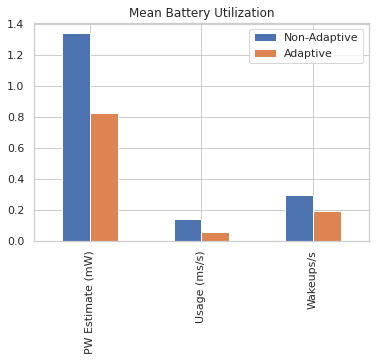

In [13]:
plotdata = pd.DataFrame({
    "Non-Adaptive":[mean_df_nadp["PW Estimate (mW)"].mean(), mean_df_nadp["Usage (ms/s)"].mean(), mean_df_nadp["Wakeups/s"].mean()],
    "Adaptive":[mean_df_adp["PW Estimate (mW)"].mean(), mean_df_adp["Usage (ms/s)"].mean(), mean_df_adp["Wakeups/s"].mean()]
    }, 
    index=["PW Estimate (mW)", "Usage (ms/s)", "Wakeups/s"]
)
plotdata.plot(kind="bar")
plt.title("Mean Battery Utilization")

plt.savefig("graphs/exp1-dm-ctr/battery_histogram.pdf",bbox_inches='tight')

In [14]:
mean_df_adp = mean_df_adp[:36]
mean_df_nadp = mean_df_nadp[:36]

In [15]:
df_battery = pd.DataFrame(columns=["time_adp", "time_nadp", "adp", "nadp"])
df_battery["time_adp"] = mean_df_adp["time"]
df_battery["time_nadp"] = mean_df_nadp["time"]
df_battery["adp"] = mean_df_adp["PW Estimate (mW)"]
df_battery["nadp"] = mean_df_nadp["PW Estimate (mW)"]

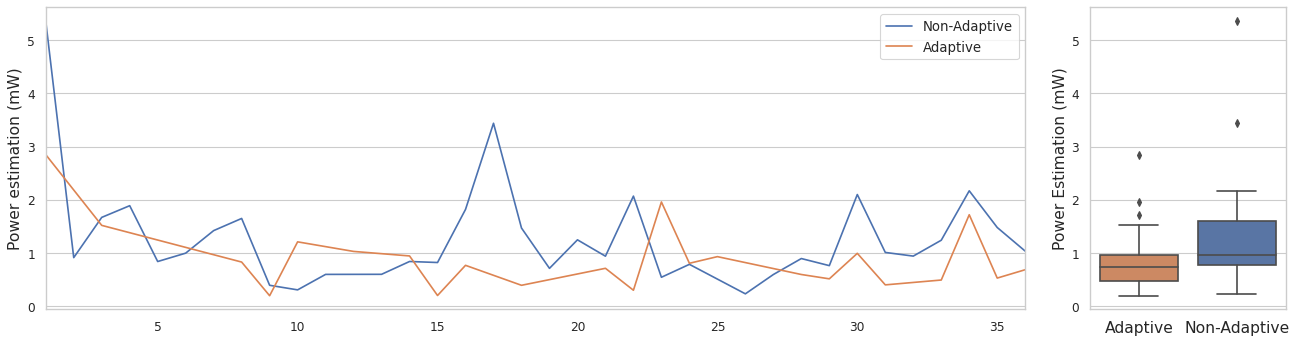

In [16]:
# Draw plot
f = plt.figure(figsize=(20,5), dpi=80)

gs = gridspec.GridSpec(1, 2,width_ratios=[5,1])
              
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

sns.lineplot(x='time_nadp', y='nadp', data=df_battery, ax=ax1, color=sns.color_palette()[0])
sns.lineplot(x='time_adp', y='adp', data=df_battery, ax=ax1, color=sns.color_palette()[1])

ax1.legend(["Non-Adaptive", "Adaptive"], loc="upper right", prop={'size': 12})

ax1.set_xlabel('', fontsize=1)
ax1.set_ylabel('Power estimation (mW)', fontsize=14)
ax1.set_xlim(1,36)

colors = [sns.color_palette()[1], sns.color_palette()[0]]
sns.boxplot(data=[df_battery[:36]["adp"], df_battery[:36]["nadp"]], ax=ax2, palette=colors);
ax2.set_xticklabels(['Adaptive', 'Non-Adaptive'], fontsize=14)
ax2.set_ylabel('Power Estimation (mW)', fontsize=14)

plt.subplots_adjust(wspace=0.11)

ax1.xaxis.grid(False)

plt.savefig("graphs/exp1-dm-ctr/PWEstimation.pdf",bbox_inches='tight')

In [17]:
df_battery.mean()

time_adp     28.088235
time_nadp    18.500000
adp           0.823441
nadp          1.288211
dtype: float64